In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import open3d
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation as R3D

## Prepare Scene

In [5]:
from pycamcal.simulation.cornell_box import create_cornell_box
from pycamcal.simulation.checkerboard import create_checkerboard_mesh

# create basic environment for some nice visual context
cornell_box = create_cornell_box(width=6, height=5)

# create calibration target
checkerboard = create_checkerboard_mesh(num_rows=7, num_cols=10, square_size=0.25)
checkerboard.translate(-checkerboard.get_center())
checkerboard.translate([0, 1, 1])
checkerboard.rotate(R3D.from_euler("x", 90, degrees=True).as_matrix())

scene = [*cornell_box.values(), checkerboard]
print(scene)

[TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 280 points and 140 triangles.]


In [6]:
# # preview scene setup
# world_axes = open3d.geometry.TriangleMesh.create_coordinate_frame()
# open3d.visualization.draw_geometries([*scene, world_axes], mesh_show_back_face=True)

## Prepare Camera

In [ ]:
from pycamcal.camera_model import CameraModel
from pycamcal.camera_model import RadialTangentialDistortion

distortion = RadialTangentialDistortion(
    k1=-0.25,
    k2=0.0,
    k3=0.0,
    p1=0.0,
    p2=0.0
)

camera = CameraModel.from_fov(
    res_xy = (120*2, 100*2),
    fov_xy = (72, 60),
    distortion = distortion
)

print(camera)

## Render

undistorting rays: 100%|██████████| 48000/48000 [00:00<00:00, 615918.74it/s]


(100, 120, 3)


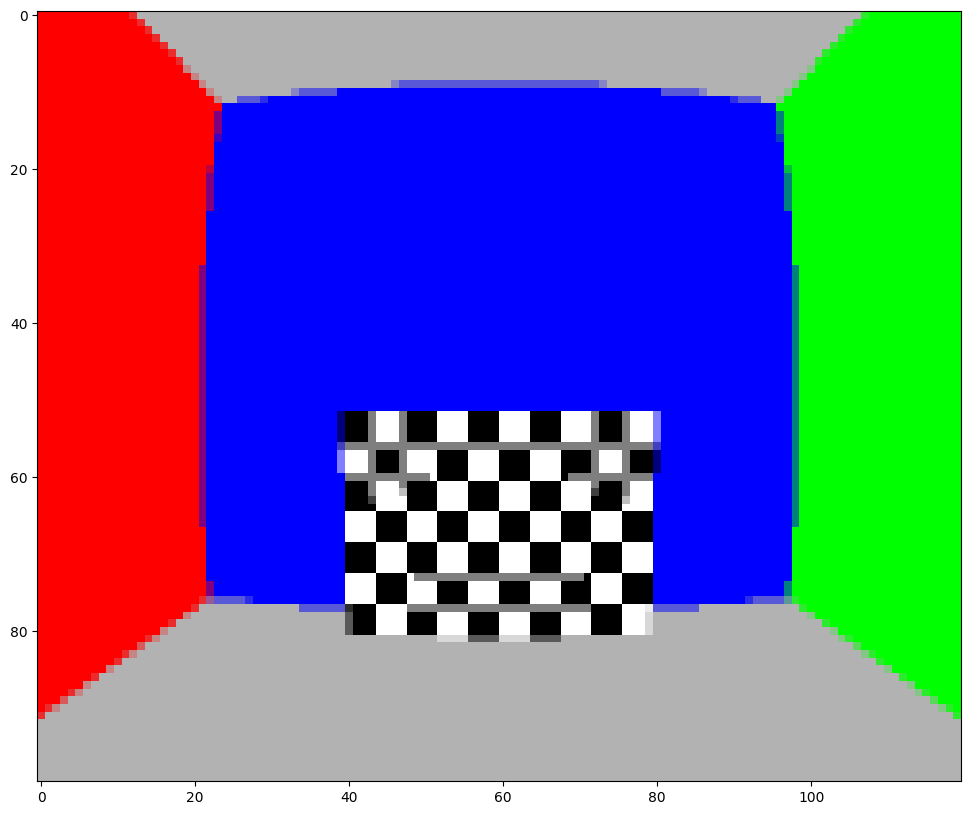

In [13]:
from pycamcal.primitives.pose import Pose3D
from pycamcal.simulation.raycasting import simulate_capture

camera_pose = Pose3D(
    np.array([0, -4.0, 2.0]),
    R3D.from_euler("x", -90, degrees=True)
)

image = simulate_capture(scene, camera, camera_pose, rays_per_pixel=4)
print(image.shape)

fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(image)